## Name- Ranjan Pratap Singh                                                      DS2307

# ---------------------- Project 2- medical cost insurance ----------------------

##### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
##### Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [2]:
df = pd.read_csv("C://Users//RANJAN//OneDrive//Desktop//medical_cost_insurance.csv")

### Exploratory Data Analysis(EDA)  ----->

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

Our dataset- medical insurance of shape (1339 rows , 7 columns) .  It tells about  Individual medical costs billed by health insurance based on various parameters given. Charges is our target variable . Our data set consist of both categorical and  continuous  values and our target variable consist of continuous  data  so it is a  regression problem i.e. we will use regression models to train, test and predict  the data.

##### ---->checking for duplicated values

In [5]:
df.duplicated().sum()

1

In [6]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


---> we found that in our dataset there is 1 duplicated values so we will remove the duplicated value 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


#### Here we observe our datatypes . 
We observe that  our features have  all datatypes -'float64', int and object(string)
#### We can see that there is no null values but to check it further  the possibility of white sapces    we will  check again

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      675
female    662
Name: sex, dtype: int64


32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64


0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1063
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
      

#### after checking the value_counts we can be sure that there is not missing values i.e. null values.

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see  all the data have almost same so  the data is normally distributed

if we see for outliers we can observe that Bmi may contain outliers that we will check  later in this model

### Data Visualization --->

-- Univariate Analysis

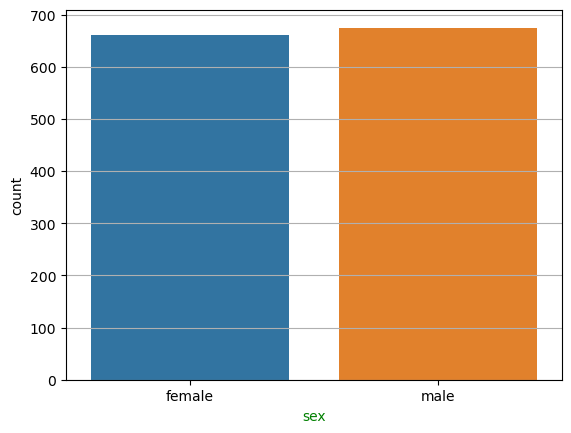

male      675
female    662
Name: sex, dtype: int64

In [12]:
sns.countplot(x='sex' , data = df)
plt.xlabel('sex',color = 'g')
plt.grid(axis ='y')
plt.show()
df.sex.value_counts()

we can see our data has  approx equal numbers of male and female insurance contractor 

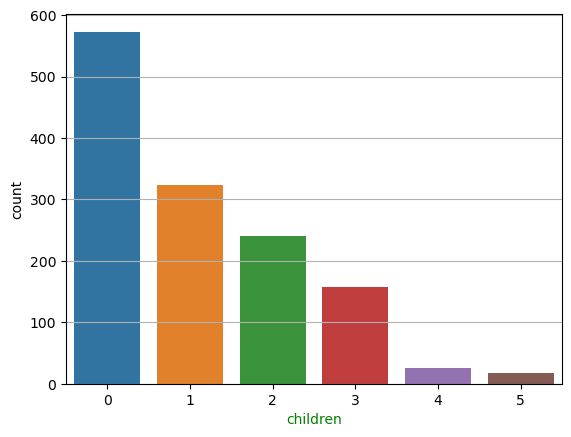

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
sns.countplot(x='children' , data = df)
plt.xlabel('children',color = 'g')
plt.grid(axis ='y')
plt.show()
df.children.value_counts()

from this  countplot we can conclude very less insurance cover for more children and more insurance cover for less children

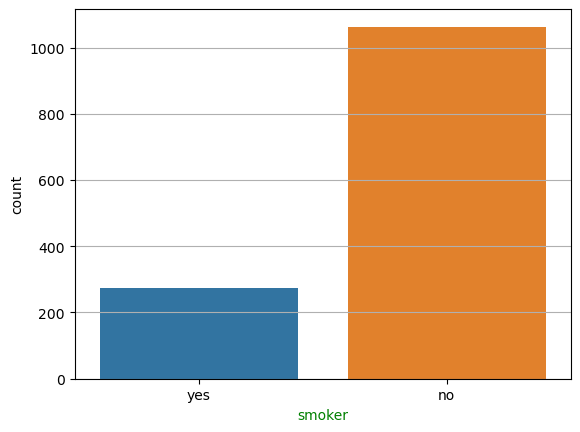

no     1063
yes     274
Name: smoker, dtype: int64

In [14]:
sns.countplot(x='smoker' , data = df)
plt.xlabel('smoker',color = 'g')
plt.grid(axis ='y')
plt.show()
df.smoker.value_counts()

here we can see the number of non-smoker is far more than smoker 

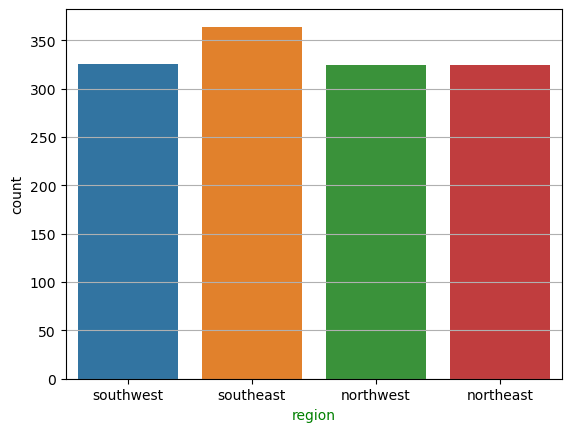

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [15]:
sns.countplot(x='region' , data = df)
plt.xlabel('region',color = 'g')
plt.grid(axis ='y')
plt.show()
df.region.value_counts()

we can see in this graph that there is no significant difference in  number of benificiaries among the areas  

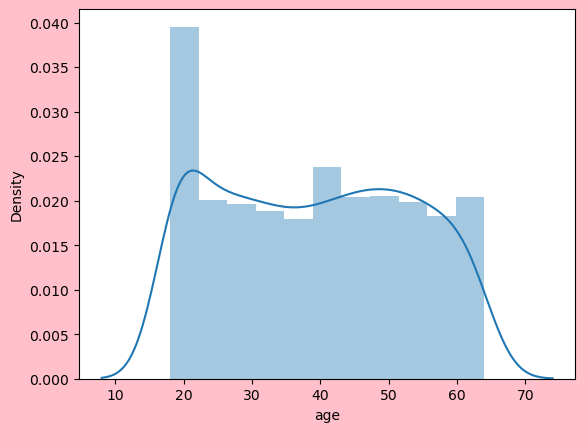

In [16]:
plt.figure(facecolor="pink")
sns.distplot(df['age'])
plt.show()

in this age distplot data is lookalike normal distribution so we can say there is no age group which is significantly higher than another

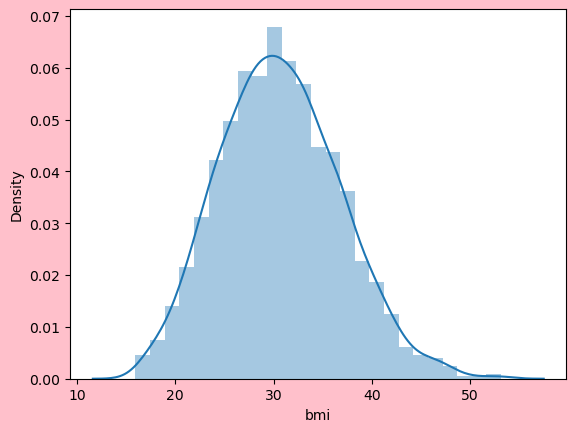

In [17]:
plt.figure(facecolor="pink")
sns.distplot(df['bmi'])
plt.show()

in this  bmi distplot we can conclude data is normally distributed . we will further check later  in this project we can conclude fully  

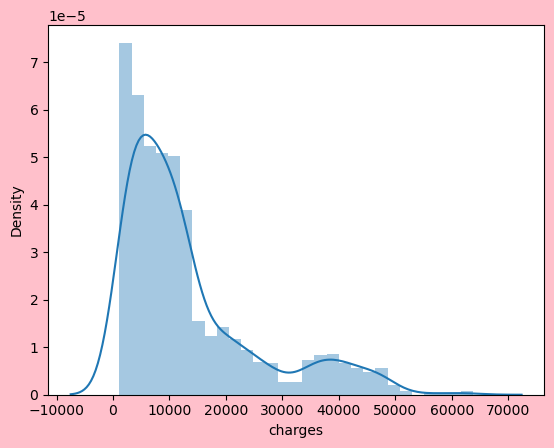

In [18]:
plt.figure(facecolor="pink")
sns.distplot(df['charges'])
plt.show()

this is our target variable and it can be seen that data is rightly skewed  

-- bivariate analysis

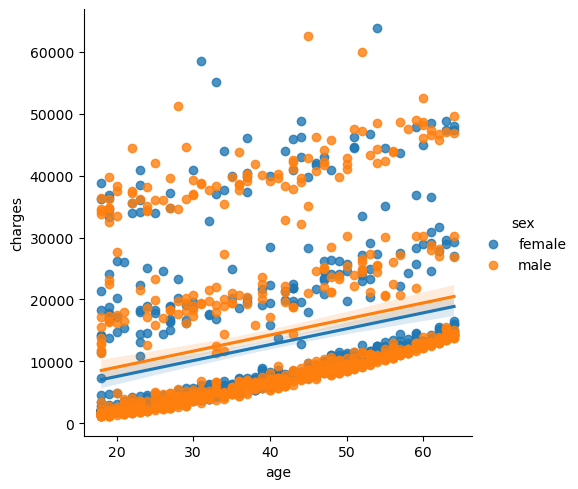

In [19]:
sns.lmplot(x='age', y= 'charges',  data= df , hue = 'sex' )
plt.show()

we can see  from this plot there is positive relation between charges and age as when age increases charges increases and it increases more in case of male

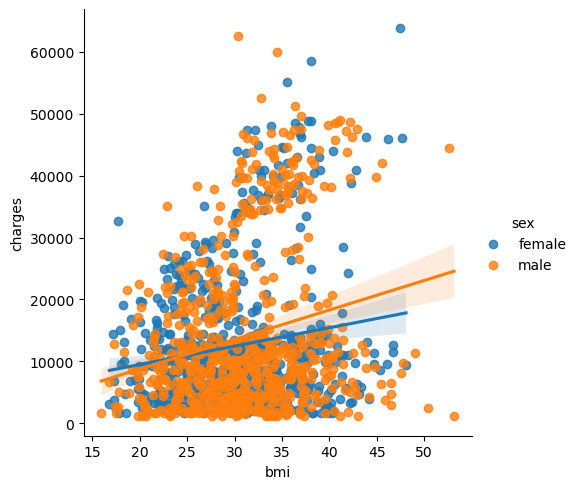

In [20]:
sns.lmplot(x='bmi', y= 'charges',  data= df , hue = "sex")
plt.show()

we can see  from this plot there is positive relation between charges and bmi and chagres for men increases more compare to women as when bmi goes up as we can see from the line in the graph 

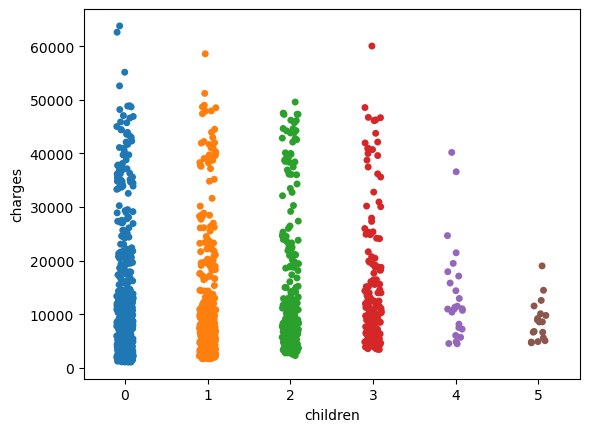

In [21]:
sns.stripplot(x='children', y= 'charges', data= df )
plt.show()

we can conclude by seeing this data that uptill 3 children charges goes very high after that relatively low 

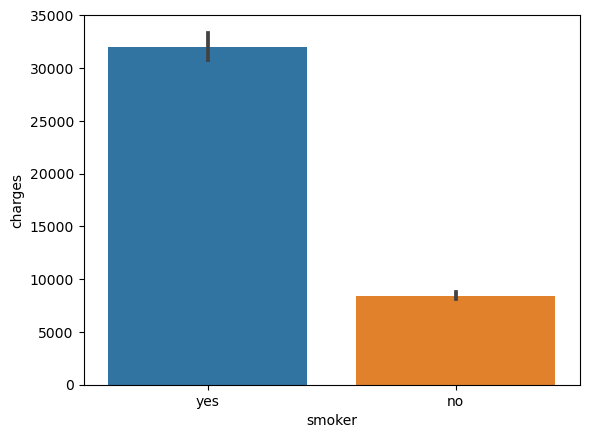

In [22]:
sns.barplot(x='smoker', y= 'charges', data= df )
plt.show()

we can see that charges for smoker is high and charges for no smoker is low

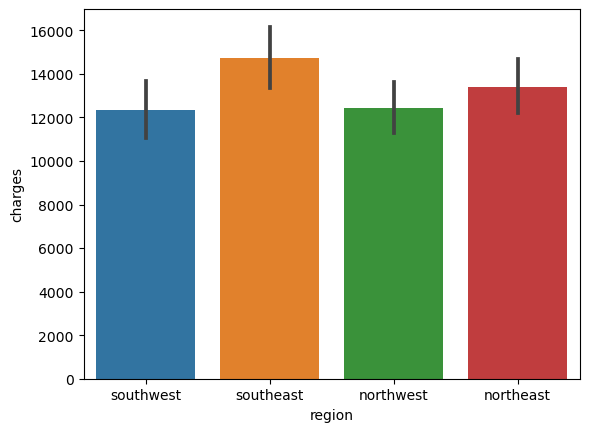

In [23]:
sns.barplot(x='region', y= 'charges', data= df )
plt.show()

in thsi there is no significant difference 

-- Miltivariate analysis

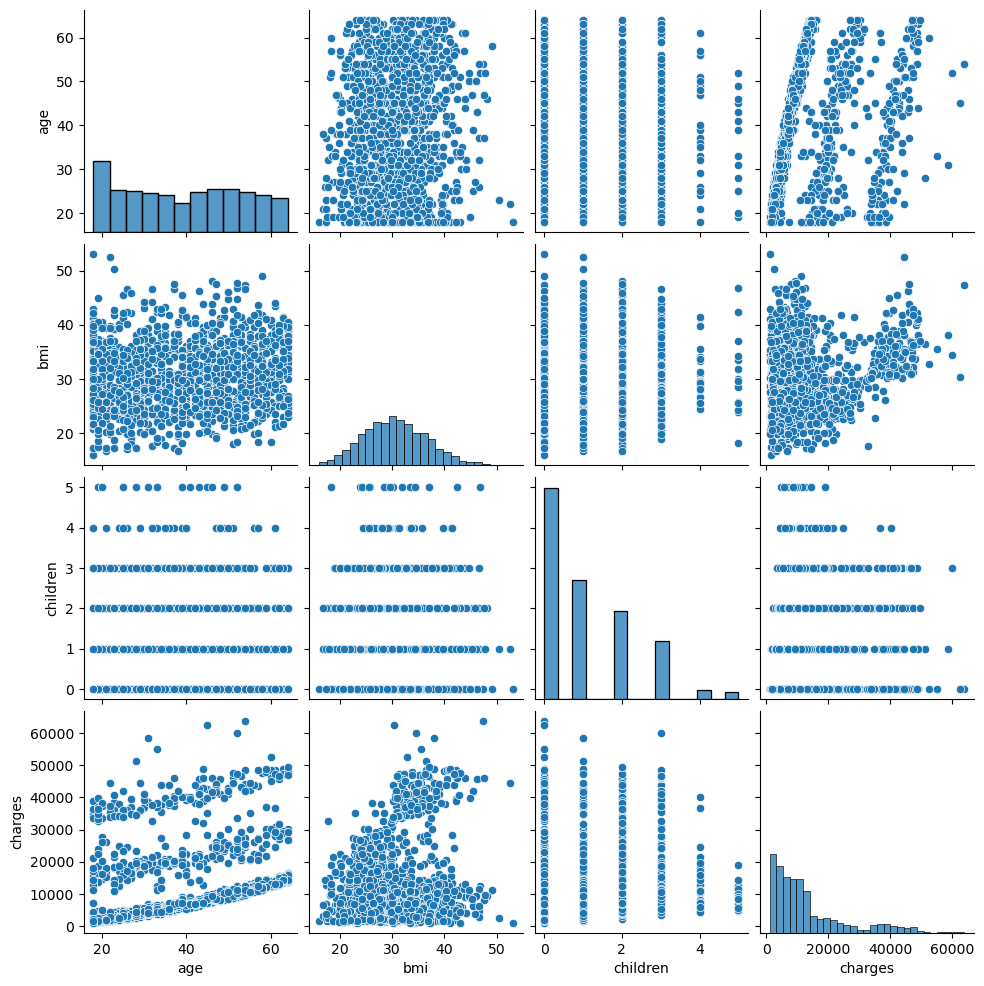

In [24]:
sns.pairplot(df)
plt.show()

after analysis of pair plots we can not analyze  any significant relation between variables 

### -- Checking for Outliers

In [25]:
df1 = df.drop(columns=['sex','children','smoker','region'])

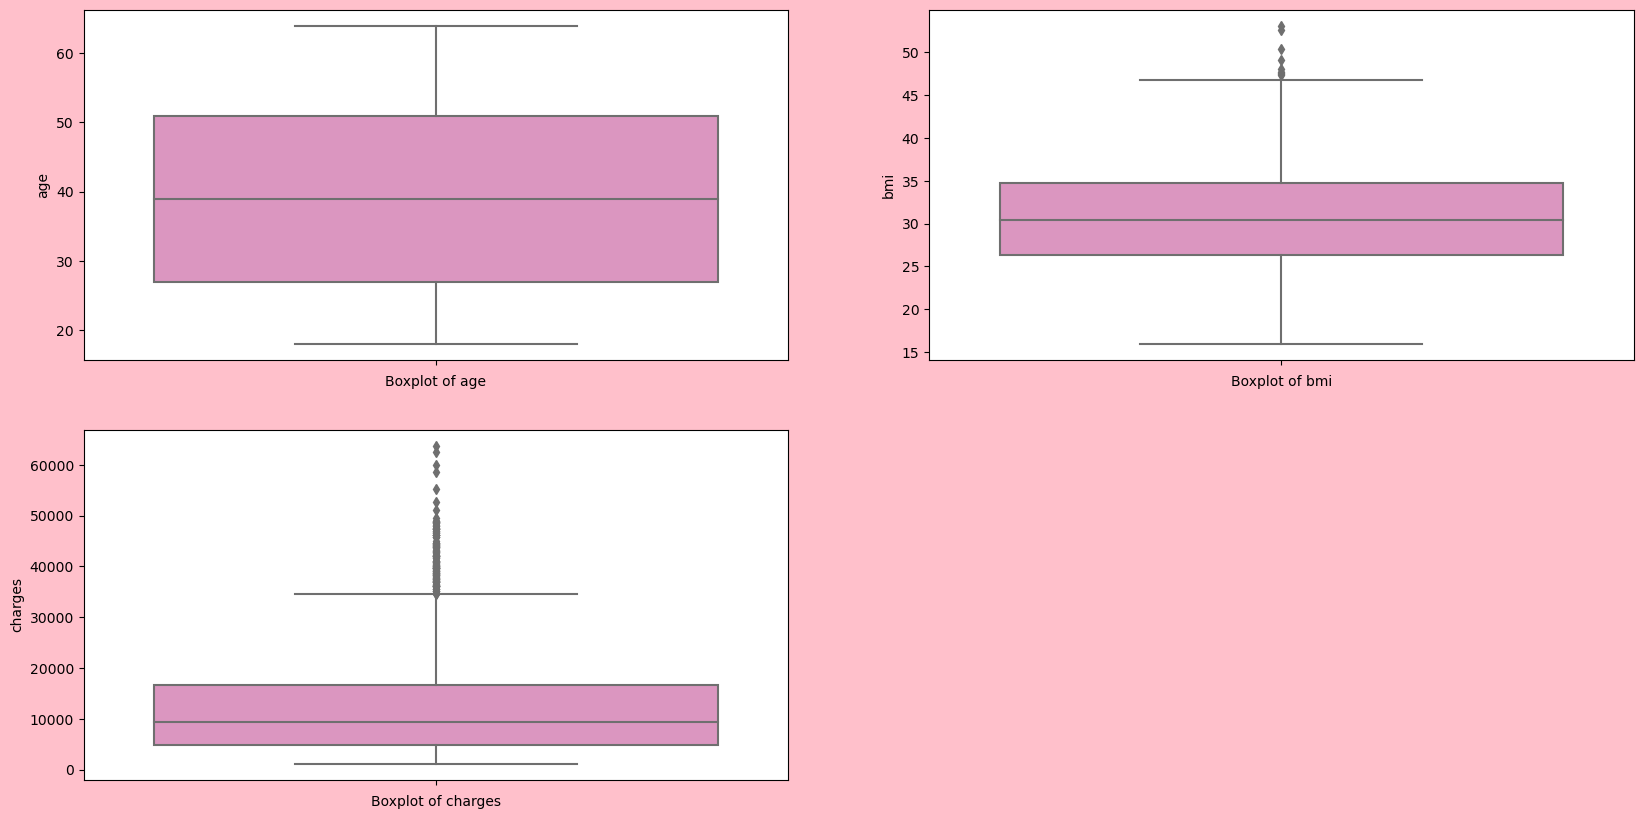

In [26]:
plt.figure(figsize=(20, 10), facecolor="pink")

plotnumber = 1
numerical_cols = df1.columns  # Assuming df1 contains your DataFrame

for column in numerical_cols:
    if plotnumber <= 3:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data=df1, y=column, orient='h', palette='Set2_r')
        ax.set_xlabel(f'Boxplot of {column}')
    plotnumber += 1

plt.show()


##### we can see that  there are outliers in BMI  . now we will try to remove the outliers 

by using Interquartile range

In [27]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < (Q1-1.5*IQR)) |(df> (Q3 + 1.5*IQR))).any(axis=1)]

In [28]:
df2.shape

(1192, 7)

In [29]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 10.845175766641734


the data loss in IQR method is 10.84% that is too much so we will check another method i.e. z-score 

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,age,bmi,charges
0,1.440418,0.453160,0.297857
1,1.511647,0.509422,0.954381
2,0.799350,0.383155,0.729373
3,0.443201,1.305052,0.719104
4,0.514431,0.292456,0.777499
...,...,...,...
1332,0.767704,0.050269,0.221263
1333,1.511647,0.206053,0.914695
1334,1.511647,1.014490,0.962287
1335,1.297958,0.797524,0.931054


In [31]:
np.where(z>3)

(array([  34,  116,  543,  577,  818,  846, 1046, 1145, 1229, 1299, 1316],
       dtype=int64),
 array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64))

In [32]:
df3= df[(z<3).all(axis=1)]

In [33]:
df3.shape

(1326, 7)

In [34]:
print('percentage of dataloss',((df.shape[0]-df3.shape[0])/df.shape[0])*100)

percentage of dataloss 0.8227374719521316


#### herein z-score data loss is 0.8% , as so we will use z score for removing outliers 

In [35]:
df=df3


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df1 = df.drop(columns=['sex','children','smoker','region'])

 ### -- Checking for Skewness

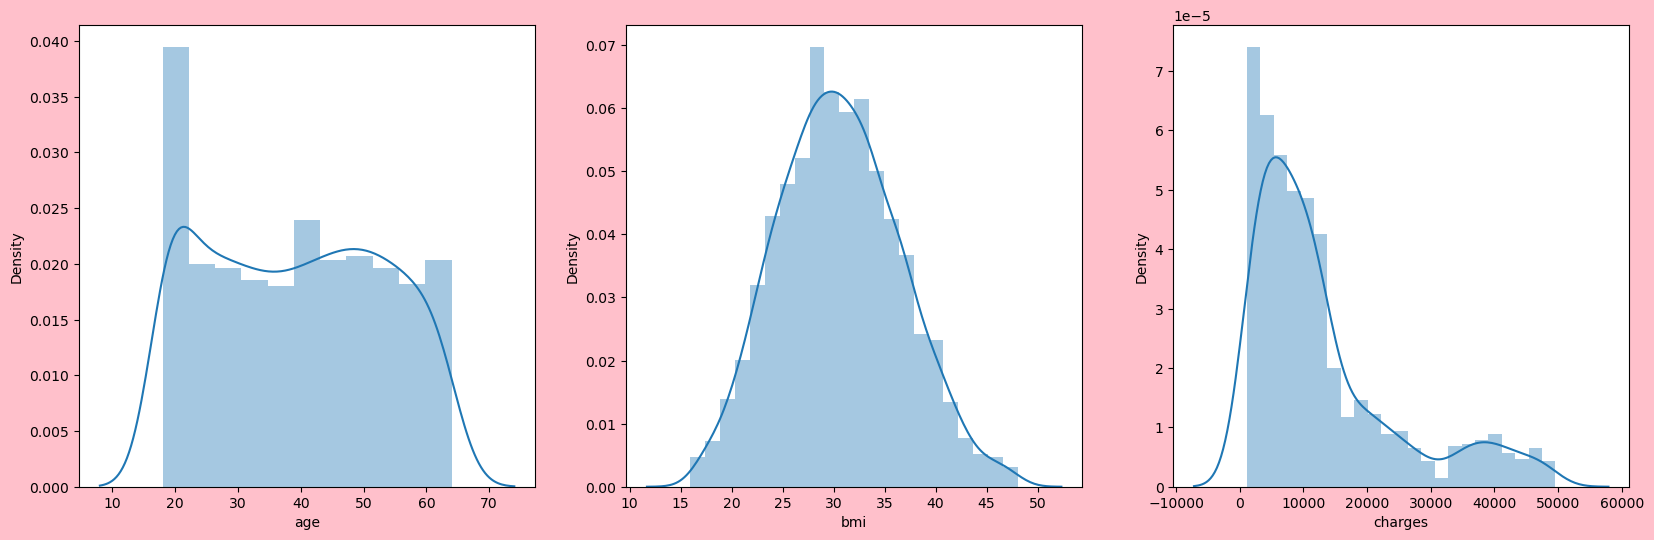

In [38]:
plt.figure(figsize=(20, 6), facecolor="pink")
plotnumber = 1

for column in df1:  # Assuming numerical_col is a list of numerical column names
    if plotnumber <= 3:
        ax = plt.subplot(1,3, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.show()

In [39]:
df.skew()

age         0.054134
bmi         0.203657
children    0.932413
charges     1.452917
dtype: float64

#### after checking the  graphs and data we see that features are almost normally distributed

 ### Using ordinal encoder
 for transforming categorical data into numerical data 

In [40]:
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1332,50,1.0,30.970,3,0.0,1.0,10600.54830
1333,18,0.0,31.920,0,0.0,0.0,2205.98080
1334,18,0.0,36.850,0,0.0,2.0,1629.83350
1335,21,0.0,25.800,0,0.0,3.0,2007.94500


### checking for correlation 

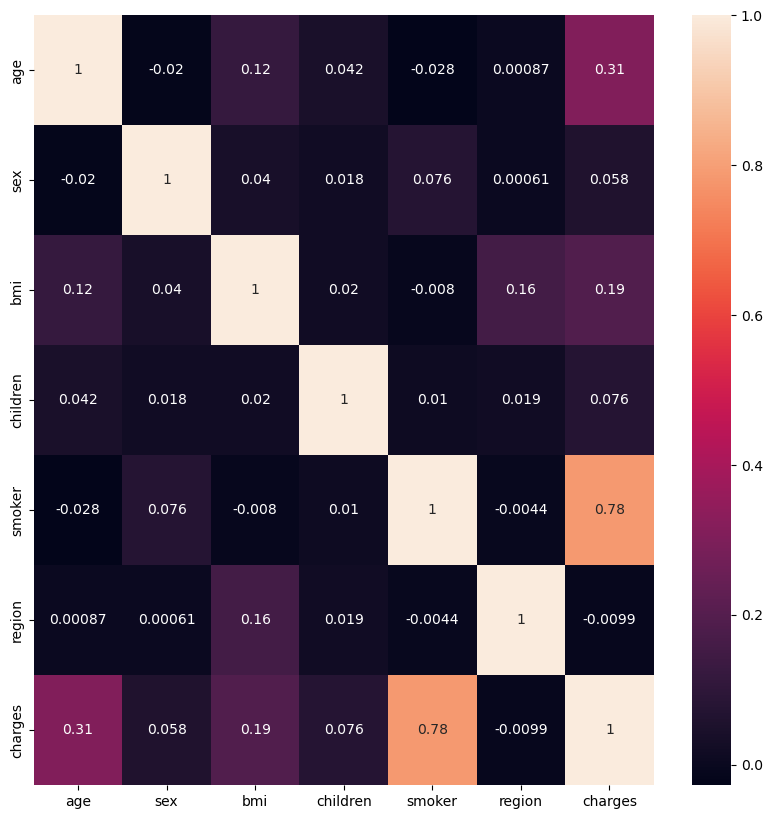

In [41]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation , annot = True )
plt.show()

In [42]:
df.corr().charges.sort_values(ascending=False)


charges     1.000000
smoker      0.784877
age         0.306378
bmi         0.189157
children    0.076002
sex         0.058106
region     -0.009895
Name: charges, dtype: float64

in correaltion heatmap we can see that except for region all the values have positive correlation with target variable

We can not see correlations between variables so  w can concludethat there is no multicollinearity 

### Seperating features and target variable

In [43]:
X = df.drop(['charges'], axis=1)
Y = df['charges']


### Scaling using Standard Scalar

In [44]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,age,sex,bmi,children,smoker,region
0,-1.441573,-1.006051,-0.445829,-0.911193,1.996237,1.343450
1,-1.512840,0.993985,0.534055,-0.082495,-0.500943,0.439637
2,-0.800169,0.993985,0.405518,1.574902,-0.500943,0.439637
3,-0.443834,0.993985,-1.313035,-0.911193,-0.500943,-0.464175
4,-0.515101,0.993985,-0.282237,-0.911193,-0.500943,-0.464175
...,...,...,...,...,...,...
1321,0.767707,0.993985,0.066648,1.574902,-0.500943,-0.464175
1322,-1.512840,-1.006051,0.225233,-0.911193,-0.500943,-1.367988
1323,-1.512840,-1.006051,1.048202,-0.911193,-0.500943,0.439637
1324,-1.299039,-1.006051,-0.796384,-0.911193,-0.500943,1.343450


## Creating train test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = 25)

In [46]:
X_test.shape

(332, 6)

In [47]:
X_train.shape 

(994, 6)

#### importing necessary libraries for models

In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
LR = LinearRegression()
LS = Lasso()
RIG= Ridge()
SVM=SVR()
RFR=RandomForestRegressor()
DTR = DecisionTreeRegressor()
abr = AdaBoostRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Models

#### Lasso

In [50]:
LS.fit(X_train, Y_train)
y_pred = LS.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.7594763949722662


In [51]:
y_pred_testLS  = LS.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLS ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7307886430808401


In [52]:
mae = mean_absolute_error(Y_test, y_pred_testLS)
mse = mean_squared_error(Y_test, y_pred_testLS)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 4324.0938697658885
Mean Squared Error -->: 38153608.13212474
Root Mean Squared Error-->: 6176.860702017226


#### Ridge

In [53]:
RIG.fit(X_train, Y_train)
y_pred = RIG.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.7594756364250012


In [54]:
y_pred_testRIG  = RIG.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRIG ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7308276247853263


In [55]:
mae = mean_absolute_error(Y_test, y_pred_testRIG)
mse = mean_squared_error(Y_test, y_pred_testRIG)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 4325.247478968
Mean Squared Error -->: 38148083.50383898
Root Mean Squared Error-->: 6176.413482259666


#### Support vector model (svm)

In [57]:
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> -0.0874586724184021


In [58]:
y_pred_testSVM  = SVM.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testSVM ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> -0.10986018047466972


In [59]:
mae = mean_absolute_error(Y_test, y_pred_testSVM)
mse = mean_squared_error(Y_test, y_pred_testSVM)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 8322.879980873828
Mean Squared Error -->: 157293402.81879494
Root Mean Squared Error-->: 12541.666668301903


#### Linear Regression

In [60]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.7594764411262196


In [61]:
y_pred_testLR  = LR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7307911698665547


In [62]:
mae = mean_absolute_error(Y_test, y_pred_testLR)
mse = mean_squared_error(Y_test, y_pred_testLR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 4324.127239149831
Mean Squared Error -->: 38153250.026905514
Root Mean Squared Error-->: 6176.831714309976


#### DecisionTreeRegressor

In [63]:
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9994149128165113


In [64]:
y_pred_testDTR  = DTR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testDTR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7360432887978972


In [65]:
mae = mean_absolute_error(Y_test, y_pred_testDTR)
mse = mean_squared_error(Y_test, y_pred_testDTR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 2880.9163790331327
Mean Squared Error -->: 37408900.71763798
Root Mean Squared Error-->: 6116.281608758542


#### AdaBoost Regressor

In [66]:
abr.fit(X_train, Y_train)
y_pred = abr.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.8357303742063262


In [67]:
y_pred_testABR  = abr.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.817346879454614


In [68]:
mae = mean_absolute_error(Y_test, y_pred_testABR)
mse = mean_squared_error(Y_test, y_pred_testABR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 3879.2307324334306
Mean Squared Error -->: 25886261.50527166
Root Mean Squared Error-->: 5087.8543125046


#### Random Forest Classifier

In [69]:
RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9774789457785802


In [70]:
y_pred_testRFR  = RFR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.826053669639768


In [71]:
mae = mean_absolute_error(Y_test, y_pred_testRFR)
mse = mean_squared_error(Y_test, y_pred_testRFR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 2626.767190200903
Mean Squared Error -->: 24652303.678920563
Root Mean Squared Error-->: 4965.108627101784


we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [92]:
cscore1 = cross_val_score(abr,X,Y)
print('Cscore for AdaBoost Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for AdaBoost Regressor->  [0.8489049  0.78929053 0.84052908 0.80780275 0.83771241]
mean of cscore->  0.8248479332363449
difference between accuracy and cross validation score is 0.01890806706477044


In [74]:
cscore1 = cross_val_score(LR,X,Y)
print('Cscore for Linaer Regression -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testLR)-cscore1.mean())

Cscore for Linaer Regression ->  [0.7650029  0.71241547 0.77620074 0.73356529 0.76318227]
mean of cscore->  0.7500733318599748
difference between accuracy and cross validation score is -0.019282161993420144


In [75]:
cscore1 = cross_val_score(LS,X,Y)
print('Cscore for Lasso-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testLS)-cscore1.mean())

Cscore for Lasso->  [0.76500402 0.71244118 0.77618698 0.7335624  0.76318837]
mean of cscore->  0.750076590226728
difference between accuracy and cross validation score is -0.019287947145887885


In [76]:
cscore1 = cross_val_score(RIG,X,Y)
print('Cscore for RIDGE-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testRIG)-cscore1.mean())

Cscore for RIDGE->  [0.76498113 0.7124729  0.77611326 0.73361775 0.76319014]
mean of cscore->  0.7500750378576205
difference between accuracy and cross validation score is -0.019247413072294273


In [77]:
cscore1 = cross_val_score(SVM,X,Y)
print('Cscore for Support Vector Model -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for Support Vector Model ->  [-0.10660626 -0.10947668 -0.07017922 -0.09534378 -0.10049861]
mean of cscore->  -0.0964209101284788
difference between accuracy and cross validation score is 0.9137677895830928


In [78]:
cscore1 = cross_val_score(DTR,X,Y)
print('Cscore for Decision Tree Regressor -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testDTR)-cscore1.mean())

Cscore for Decision Tree Regressor ->  [0.76562722 0.69888797 0.69542255 0.73188492 0.66155937]
mean of cscore->  0.7106764062300975
difference between accuracy and cross validation score is 0.02536688256779962


In [79]:
cscore1 = cross_val_score(RFR,X,Y)
print('Cscore for RandomForest Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',r2_score(Y_test,y_pred_testRFR)-cscore1.mean())

Cscore for RandomForest Regressor->  [0.84986965 0.78038729 0.8597057  0.83504846 0.85495391]
mean of cscore->  0.8359930009033409
difference between accuracy and cross validation score is -0.009939331263572937


##### after analysing cross value score we can conclude   AdaBoost Classifier R2  score is good i.e. 82.48% with least deviation of only 1.89% so we choose AdaBoost Classifier

## Hyper parameter tuning

In [80]:
abr.get_params().keys()


dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [81]:
parameters = {
    'loss': ['linear', 'square', 'exponential'],  # Different loss functions
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'base_estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5), None],  # Base estimator (tree depth)
}


.# NOTE--- new updat in sklearn changed the variable name from base_estimator to estimator but our model show error so we have to use base_estimator 

In [82]:
GSC = GridSearchCV(AdaBoostRegressor(),parameters,cv= 5)


In [83]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=3),
                                            DecisionTreeRegressor(max_depth=5),
                                            None],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]})

In [84]:
GSC.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=5),
 'learning_rate': 0.01,
 'loss': 'linear',
 'n_estimators': 50}

In [85]:
abr_final = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=5),learning_rate = 0.01,loss= 'linear',n_estimators= 50)
abr_final.fit(X_train, Y_train)
y_pred = abr_final.predict(X_train)
accuracy = r2_score( Y_train,y_pred ) # checking train data 
print("R2 score of trained data--->",accuracy)

R2 score of trained data---> 0.8891388395454212


In [86]:
y_pred_testABR  = abr_final.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score--->', R2_score)

r2 score---> 0.8437560003011153


our model accuracdy increased from 82.48% to 84.37%

## Model Saving

In [87]:
import joblib
joblib.dump(abr_final,'model for estimating medical insurance cost')

['model for estimating medical insurance cost']

# Prediction 

In [88]:
mymodel = joblib.load('model for estimating medical insurance cost')
prdt = mymodel.predict(X_test)
prdt

array([17259.482315  , 14409.31905242, 10547.52876789,  7001.35422232,
       14546.07618821, 18959.21411897,  6276.6345832 , 44715.19557778,
       12239.21610375, 15755.75526367,  3420.6229529 ,  7014.23975716,
        4716.85992272, 18358.81023333,  6993.85742398,  7385.98657158,
       41469.12649211,  9886.25967039, 10547.52876789,  7386.01487865,
        9676.0883525 , 12441.83583593, 16494.67446952, 10539.84105971,
       16806.07461586, 14278.32360841, 40736.61272083, 12553.54560053,
        6738.94009949,  6980.85667109, 36633.26719263,  3496.70507262,
       12713.84554833,  3717.39958087, 15979.8083364 ,  3884.28390476,
        7269.39123049, 35340.43942353,  7014.23975716, 40344.999675  ,
        3278.42959238, 15782.48172293, 11183.15491307,  4103.46207158,
       23761.76351667, 10314.3173296 ,  3358.54118426,  6157.72667859,
       36746.92387   ,  6699.10496567, 18504.85347143, 11182.35007772,
       28868.6639    , 45886.530725  ,  2463.48021405,  9680.88832623,
      

In [89]:
a = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':a})
data1.head()

,predicted,original
0,17259.482315,17560.37975
1,14409.319052,14256.19280
2,10547.528768,9644.25250
3,7001.354222,6356.27070
4,14546.076188,14254.60820


--we can see the prediction based on the model we build